In [1]:
from src import espresso_machine as esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="UTe2") #Define project
model.set_cores(64) #Define number of prcessing cores
model.get_structure(format='poscar',path='./Research/UTe2/',name='UTe2.poscar') #Load structure
model.set_pseudo(path='./Research/UTe2/US')
model.ecutwfc(200) #Set wavefunction cutoff
model.ecutrho(1000) #Set wavefunction cutoff
model.k_points([12,8,4]) #Set number of k points
model.degauss(0.02) #Set degauss value
model.conv_thr(10**-6) #Set convergence threshold
model.smearing('mv')
model.hubbard(atom='U',orbital='5f',value=4,projection='atomic')
model.config.mixing_mode('local-TF')
model.electron_maxstep(500) #Max number of electron iteration
model.exchange_maxstep(500) #Max number of exchange iteration
model.mixing_beta(0.1)      #SCF cycle potential mixing value

In [3]:
models = model.magnetize(magnetic_atom='U')

In [4]:
models[0].optimize(calculation='relax',max_iter=3)

Starting relax iteration 1 
relax for fm is started


In [5]:
for i,state in enumerate(models):
    #Adjust parameters
    state.calculate('vc-relax')
for i,state in enumerate(models):
    state.get_structure('vc-relax') #Get vc-relaxed strucutre
    state.calculate('scf')
ground_state = esma.minimum_energy(models)

vc-relax is finished
vc-relax is finished
vc-relax is finished
vc-relax is finished
scf is finished
scf is finished
scf is finished
scf is finished
AFM3


In [6]:
# ground_state.debug=False

In [6]:
ground_state.soc()
ground_state.starting_potential()
ground_state.magnetic_angle(angle1=[0,0],angle2=[0,0])
ground_state.calculate('scf')


scf is finished


bands is finished
bands-pp is finished


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (6).

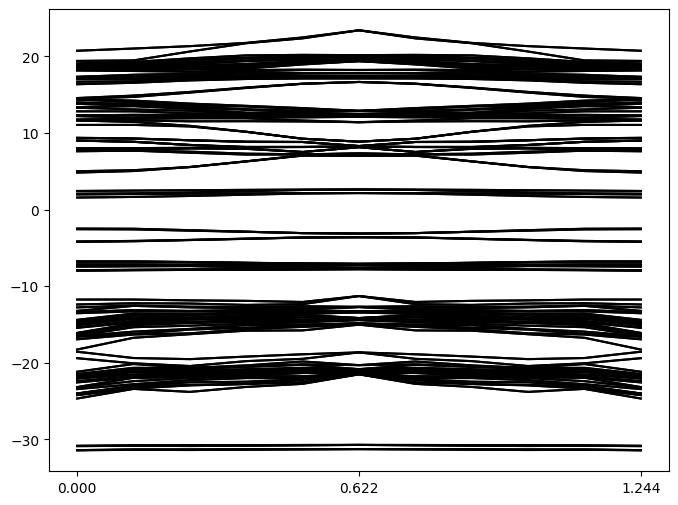

In [9]:
# ground_state.debug=False
# ground_state.calculate('scf')
path = ['GAMMA','X',"M","Y","GAMMA","Z"] #define corners
# path = ['GAMMA','R',"S","T","X"] #define corners
num_points = 5 #number of points
ground_state.band_points(path,num_points) #define path
ground_state.calculate('bands')
ground_state.plot('electron',ylim=[-20,30]) #plot el|ectron bands

[['GAMMA', 0.0, 0.0, 0.0],
 ['R', 0.5, 0.5, 0.5],
 ['S', 0.5, 0.5, 0.0],
 ['T', 0.0, 0.5, 0.5],
 ['U', 0.5, 0.0, 0.5],
 ['X', 0.5, 0.0, 0.0],
 ['Y', 0.0, 0.5, 0.0],
 ['Z', 0.0, 0.0, 0.5]]